<a href="https://colab.research.google.com/github/SLCFLAB/Data-Science-Python/blob/main/Day%203/3_2.%20Data%20exploration%20with%20Iris%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reference
https://github.com/nhkim55/bigdata_fintech_python (빅데이터 핀테크 과정) 

## Iris dataset
sklearn에 내장된 데이터셋. 붓꽃의 종류(3가지)에 따른 꽃받침과 꽃잎의 길이, 폭에 대한 데이터
Target
* 0: iris-setosa
* 1: iris-versicolor
* 2: iris-virginica

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

#Load Dataset
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [2]:
df.shape

(150, 5)

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
df['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

## Scatter plot

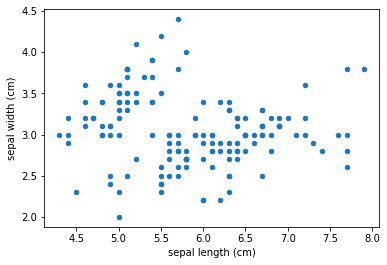

In [5]:
df.plot(kind="scatter",x="sepal length (cm)",y="sepal width (cm)")
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


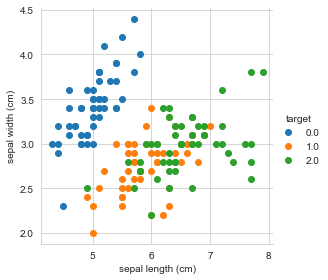

In [6]:
sns.set_style("whitegrid");
sns.FacetGrid(df,hue="target",size=4) \
    .map(plt.scatter,"sepal length (cm)","sepal width (cm)") \
    .add_legend()
plt.show()

### Rename column name

In [7]:
df.rename(columns={df.columns[0] : 'SL',
                     df.columns[1] : 'SW',
                     df.columns[2] : 'PL',
                     df.columns[3] : 'PW',
                     df.columns[4] : 'Y'}, inplace = True) # inplace=True를 써서 실제로 컬럼명을 바꿔줌 없으면 안바뀜
df.head()

,SL,SW,PL,PW,Y
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### column별 평균

In [8]:
st = df.groupby(df.Y).mean() # Y를 기준으로 그룹화를 하여 각 그룹의 평균을 구하여 준다.
st.columns.name = "변수" # columns의 이름을 "변수"로 지정한다.
st

변수,SL,SW,PL,PW
Y,,,,
0.0,5.006,3.428,1.462,0.246
1.0,5.936,2.770,4.260,1.326
2.0,6.588,2.974,5.552,2.026


### barplot

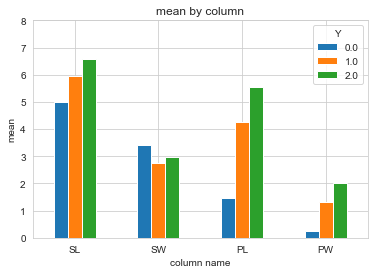

In [9]:
st.T.plot.bar(rot=0) # rot : x축 변수명의 기울기
plt.title("mean by column")
plt.xlabel("column name")
plt.ylabel("mean")
plt.ylim(0,8)
plt.show()

## 불균형한 클래스 다루기

In [10]:
# 라이브러리를 임포트합니다.
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# 붓꽃 데이터를 적재합니다.
iris = load_iris()

# 특성 행렬을 만듭니다.
features = iris.data

# 타깃 벡터를 만듭니다.
target = iris.target

# 처음 40개 샘플을 삭제합니다.
features = features[40:,:]
target = target[40:]

# 클래스 0을 음성 클래스로 하는 이진 타깃 벡터를 만듭니다.
target = np.where((target == 0), 0, 1) 

# 불균형한 타깃 벡터를 확인합니다.
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
iris_df = pd.DataFrame(data= np.c_[features, target],
                     columns= iris['feature_names'] + ['target'])
iris_df['target'].value_counts()

1.0    100
0.0     10
Name: target, dtype: int64

In [12]:
iris_df.shape

(110, 5)

* 사이킷런에 있는 많은 알고리즘은 훈련할 때 불균형한 영향을 줄일 수 있도록 클래스에 가중치를 부여할 수 있는 매개변수를 제공
* RandomForestClassifier는 class_weight 매개변수를 가진 인기 높은 분류 알고리즘
* 매개변수값에 원하는 클래스 가중치를 직접 지정할 수 있음

In [13]:
# 가중치를 만듭니다.
weights = {0: .9, 1: 0.1}

# 가중치를 부여한 랜덤 포레스트 분류기를 만듭니다.
RandomForestClassifier(class_weight=weights)

RandomForestClassifier(class_weight={0: 0.9, 1: 0.1})

* 또는 balanced로 지정하여 클래스 빈도에 반비례하게 자동으로 가중치를 만들 수 있음

In [14]:
# 균형잡힌 클래스 가중치로 랜덤 포레스트 모델을 훈련합니다.
RandomForestClassifier(class_weight="balanced")

RandomForestClassifier(class_weight='balanced')

* 다수 클래스의 샘플을 줄이거나(다운샘플링) 소수 클래스의 샘플을 늘릴 수도 있음(업샘플링)
* 다운샘플링에서는 다수 클래스(즉, 더 많은 샘플을 가진 클래스)에서 중복을 허용하지 않고 랜덤하게 샘플을 선택하여 소수 클래스와 같은 크기의 샘플 부분집합을 만들어 줌
  * 예를 들면, 소수 클래스에 10개의 샘플이 있다면 다수 클래스에서 10개의 샘플을 랜덤하게 선택하여 총 20개의 샘플을 데이터로 사용

In [15]:
# 각 클래스의 샘플 인덱스를 추출합니다.
i_class0 = np.where(target == 0)[0]
i_class1 = np.where(target == 1)[0]

# 각 클래스의 샘플 개수
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# 클래스 0의 샘플만큼 클래스 1에서 중복을 허용하지 않고 랜덤하게 샘플을 뽑습니다.
# from class 1 without replacement
i_class1_downsampled = np.random.choice(i_class1, size=n_class0, replace=False)

# 클래스 0의 타깃 벡터와 다운샘플링된 클래스 1의 타깃 벡터를 합칩니다.
np.hstack((target[i_class0], target[i_class1_downsampled]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
# 각 클래스의 샘플 인덱스를 추출합니다.
i_class0 = np.where(target == 0)[0]
i_class1 = np.where(target == 1)[0]

# 각 클래스의 샘플 개수
n_class0 = len(i_class0)
n_class1 = len(i_class1)

In [17]:
n_class1

100

In [18]:
np.vstack((features[i_class0,:], features[i_class1_downsampled,:]))[0:5]

array([[5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4]])

* 또 다른 방법은 소수의 클래스를 업샘플링하는 것
* 업샘플링에서는 다수 클래스의 샘플만큼 소수 클래스에서 중복을 허용하여 랜덤하게 샘플을 허용하여 랜덤하게 샘플 선택
* 결과적으로 다수 클래스와 소수 클래스의 샘플 수가 같아짐
* 업샘플링은 다운샘플링과 반대 방식으로 매우 비슷하게 구현

In [19]:
# 클래스 1의 샘플 개수만큼 클래스 0에서 중복을 허용하여 랜덤하게 샘플을 선택합니다.
i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)

# 클래스 0의 업샘플링된 타깃 벡터와 클래스 1의 타깃 벡터를 합칩니다.
np.concatenate((target[i_class0_upsampled], target[i_class1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [20]:
# 클래스 0의 업샘플링된 특성 행렬과 클래스 1의 특성 행렬을 합칩니다.
np.vstack((features[i_class0_upsampled,:], features[i_class1,:]))[0:5]

array([[4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4]])